In [2]:
%matplotlib inline

In [3]:
import sympy
import math
import cmath
import numpy as np
import numpy.polynomial.polynomial as p
import matplotlib.pyplot as plt
from turtle import *
import re
from sympy.ntheory import discrete_log
from matplotlib.transforms import Affine2D
import skimage.io
import time
# imports for egienvalues and eigenvectors
from numpy import linalg as LA

# Principal Component Analysis

## Topic:

Principal Component Analysis

Sometimes a projection of a higher-dimensional to a lower-dimensional space is useful. It's extremely useful if we want to get some visual understanding of a, say, 15D space, in 3D or even 2D. One algorithm which allows us to project multidimensional data into fewer dimensions while keeping the most important shapes and structures is called principal component analysis (PCA). You can explore this using the following checklist:

- [x] What are eigenvalues and eigenvectors?
- [ ] What is the eigenbasis? 
- [ ] What is the spectrum of a matrix?
- [x] How do we compute the eigenvalues and eigenvectors of a matrix?
- What is projection?
- How does projection conserve some shapes? Think about an object casting a shadow
- How is the projection problem related to eigenvalues and eigenvectors?
- [x] What is PCA?
- What are principal components? How many components are there (as a function of dimensions of the original space)?
- What is variance? What is explained variance?
- How do principal components relate to explained variance?
- How is PCA implemented? Implement and show
- Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images
- Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.

---

- [ ] SVG?

## PCA Motivation

Here is the perspective: we are an experimenter. We are trying to understand some phenomenon by measuring various quantities (e.g. spectra, voltages, velocities, etc.) in our system. Unfortunately, we can not figure out what is happening because the data appears clouded, unclear and even redundant. This is not a trivial problem, but rather a fundamental obstacle in empirical science. Examples abound from complex systems such as neuroscience, photometry, meteorology and oceanography - the number of variables to measure can be unwieldy and at times even deceptive, because the underlying relationships can often be quite simple. Take for example a simple toy problem from physics diagrammed in Figure 1. Pretend we are studying the motion of the physicist’s ideal spring. This system consists of a ball of mass m attached to a massless, friction- less spring. The ball is released a small distance away from equilibrium (i.e. the spring is stretched). Because the spring is “ideal,” it oscillates indefinitely along the x-axis about its equilibrium at a set frequency. This is a standard problem in physics in which the motion along the x direction is solved by an explicit function of time. In other words, the underlying dynamics can be expressed as a function of a single variable x. However, being ignorant experimenters we do not know any of this. We do not know which, let alone how many, axes and dimensions are important to measure. Thus, we decide to measure the ball’s position in a three-dimensional space (since we live in a three dimensional world). Specifically, we place three movie cameras around our system of interest. At 200 Hz each movie camera records an image indicating a two dimensional position of the ball (a projection). Unfortunately, because of our ignorance, we do not even know what are the real “x”, “y” and “z” axes, so we choose three camera axes {~a, ~b,~c} at some arbitrary angles with respect to the system. The angles between our measurements might not even be 90o! Now, we record with the cameras for several minutes. The big question remains: how do we get from this data set to a simple equation of x? We know a-priori that if we were smart experimenters, we would have just measured the position along the xaxis with one camera. But this is not what happens in the real world. We often do not know which measurements best reflect the dynamics of our system in question. Furthermore, we sometimes record more dimensions than we actually need! Also, we have to deal with that pesky, real-world problem of noise. In the toy example this means that we need to deal with air, imperfect cameras or even friction in a less-than-ideal spring. Noise contaminates our data set only serving to obfuscate the dynamics further. This toy example is the challenge experimenters face everyday.


## What is PCA?

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

The central idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of a large number of interrelated variables while retaining as much as possible of the variation present in the data set. This is achieved by transforming to a new set of variables, the principal components (PCs), which are uncorrelated, and which are ordered so that the first few retain most of the variation present in all of the original variables.

For example lets say that we have 15 dimensions but we can only view a 3 dimensional (3D) space. PCA solves this for us by reducing the dimensions from 15 to 3. Another example is reducing a 3D image to its first 2 principal components and plotting the 3D as a 2D image.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.


## What are eigenvalues and eigenvectors?

In linear algebra, an eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. 

The corresponding eigenvalue, often denoted by λ is the factor by which the eigenvector is scaled.

Let’s consider for an example that we want to build mathematical models (equations) where the input data is gathered from a large number of sources.

It introduces its own sets of problems such as the large sparse matrix can end up taking a significant amount of space on a disk. Plus, it becomes extremely time-consuming for the model to train itself on the data. Furthermore, it is difficult to understand and visualize data with more than 3 dimensions, let alone a dataset of over 100+ dimensions. Hence, it would be ideal to somehow compress/transform this data into a smaller dataset.

There is a solution. We can utilise Eigenvalues and Eigenvectors to reduce the dimension space. To elaborate, one of the key methodologies to improve efficiency in computationally intensive tasks is to reduce the dimensions after ensuring most of the key information is maintained.

**Eigenvalues and Eigenvectors are the key tools to use in those scenarios.**

**1. What Is An Eigenvector?**

For the sake of simplicity, let’s consider that we live in a two-dimensional world.

- Alex’s house is located at coordinates [10,10] (x=10 and y =10). Let’s refer to it as vector A.

- Furthermore, his friend Bob lives in a house with coordinates [20,20] (x=20 and y=20). I will refer to it as vector B.

If Alex wants to meet Bob at his place then Alex would have to travel +10 points on the x-axis and +10 points on the y-axis. This movement and direction can be represented as a two-dimensional vector [10,10]. Let’s refer to it as vector C.

We can see that vector A to B are related because vector B can be achieved by scaling (multiplying) the vector A by 2. This is because 2 x [10,10] = [20,20]. This is the address of Bob. Vector C also represents the movement for A to reach B.

**The key to note is that a vector can contain the magnitude and direction of a movement.**

We learned from the introduction above that large set of data can be represented as a matrix and we need to somehow compress the columns of the sparse matrix to speed up our calculations. Plus if we multiply a matrix by a vector then we achieve a new vector. The multiplication of a matrix by a vector is known as transformation matrices.

**We can transform and change matrices into new vectors by multiplying a matrix with a vector. The multiplication of the matrix by a vector computes a new vector. This is the transformed vector.**
    
- Sometimes, the new transformed vector is just a scaled form of the original vector. This means that the new vector can be re-calculated by simply multiplying a scalar (number) to the original vector; just as in the example of vector A and B above.
    
- And other times, the transformed vector has no direct scalar relationship with the original vector which we used to multiply to the matrix.

**If the new transformed vector is just a scaled form of the original vector then the original vector is known to be an eigenvector of the original matrix. Vectors that have this characteristic are special vectors and they are known as eigenvectors. Eigenvectors can be used to represent a large dimensional matrix.**

Therefore, if our input is a large sparse matrix M then we can find a vector o that can replace the matrix M. The criteria is that the product of matrix M and vector o should be the product of vector o and a scalar n:

$$M * o = n* o$$

This means that a matrix M and a vector o can be replaced by a scalar n and a vector o.
In this instance, o is the eigenvector and n is the eigenvalue and our target is to find o and n.

Therefore an eigenvector is a vector that does not change when a transformation is applied to it, except that it becomes a scaled version of the original vector.

Eigenvectors can help us calculating an approximation of a large matrix as a smaller vector. There are many other uses which I will explain later on in the article.

Eigenvectors are used to make linear transformation understandable. Think of eigenvectors as stretching/compressing an X-Y line chart without changing their direction.

**2. What is an Eigenvalue?**

*Eigenvalue— The scalar that is used to transform (stretch) an Eigenvector.*

**3. Where are Eigenvectors and Eigenvalues used?** 

There are multiple uses of eigenvalues and eigenvectors:

1. Eigenvalues and Eigenvectors have their importance in linear differential equations where you want to find a rate of change or when you want to maintain relationships between two variables.

*Think of eigenvalues and eigenvectors as providing summary of a large matrix*

2. We can represent a large set of information in a matrix. Performing computations on a large matrix is a very slow process. To elaborate, one of the key methodologies to improve efficiency in computationally intensive tasks is to reduce the dimensions after ensuring most of the key information is maintained. Hence, one eigenvalue and eigenvector are used to capture key information that is stored in a large matrix. This technique can also be used to improve the performance of data churning components.

3. Component analysis is one of the key strategies that is utilised to reduce dimension space without losing valuable information. The core of component analysis (PCA) is built on the concept of eigenvalues and eigenvectors. The concept revolves around computing eigenvectors and eigenvalues of the covariance matrix of the features.

4. Additionally, eigenvectors and eigenvalues are used in facial recognition techniques such as EigenFaces.

5. They are used to reduce dimension space. The technique of Eigenvectors and Eigenvalues are used to compress the data. As mentioned above, many algorithms such as PCA rely on eigenvalues and eigenvectors to reduce the dimensions.

*Eigenvectors and eigenvalues are used to reduce noise in data. They can help us improve efficiency in computationally intensive tasks. They also eliminate features that have a strong correlation between them.*

6. Occasionally we gather data that contains a large amount of noise. Finding important or meaningful patterns within the data can be extremely difficult. Eigenvectors and eigenvalues can be used to construct spectral clustering. They are also used in singular value decomposition.

7. We can also use eigenvector to rank items in a dataset. They are heavily used in search engines and calculus.

8. Lastly, in non-linear motion dynamics, eigenvalues and eigenvectors can be used to help us understand the data better as they can be used to transform and represent data into manageable sets.

*It can be slow to compute eigenvectors and eigenvalues. The computation is $O(n^3)$*

**4. What are the building blocks of Eigenvalues and Eigenvectors?**

Let’s understand the foundations of Eigenvalues and Eigenvectors.

Eigenvectors and eigenvalues revolve around the concept of matrices.

Matrices are used in machine learning problems to represent a large set of information. Eigenvalues and eigenvectors are all about constructing one vector with one value to represent a large matrix. Sounds very useful, right?

**What is a matrix?** 

- A matrix has a size of X rows and Y columns, like a table.

- A square matrix is the one that has a size of n, implying that X and Y are equal.

- A square matrix is represented as A. This is an example of a square matrix:

$$
\begin{bmatrix}
A & B & C \\
D & E & F \\
G & H & I
\end{bmatrix}
$$

*Note: Matrix properties are out of the scope of this article.*

## How do we compute the eigenvalues and eigenvectors of a matrix?

Calculating Eigenvectors and Eigenvalues

*Although we don’t have to calculate the Eigenvalues and Eigenvectors by hand every time but it is important to understand the inner workings to be able to confidently use the algorithms.*

- The eigenvector is an array with n entries where n is the number of rows (or columns) of a square matrix. The eigenvector is represented as x.

- Key Note: The direction of an eigenvector does not change when a linear transformation is applied to it.

- Therefore, Eigenvector should be a non-null vector

- We are required to find a number of values, known as eigenvalues such that

$$ A * x = \lambda * x$$

The above equation states that we need to find eigenvalue (lambda) and eigenvector (x) such that when we multiply a scalar lambda (eigenvalue) to the vector x (eigenvector) then it should equal to the linear transformation of the matrix A once it is scaled by vector x (eigenvector).

**Eigenvalues are represented as lambda.**

**Note: The above equation should not be invertible.**

There are two special keywords which we need to understand: Determinant of a matrix and an identity matrix.

The **determinant of a matrix** is a number that is computed from a square matrix. In a nutshell, the diagonal elements are multiplied by each other and then they are subtracted together. We need to ensure that the determinant of the matrix is 0.

We need an **Identity Matrix**. An identity square matrix is a matrix that has 1 in diagonal and all of its elements are 0. The identity matrix is represented as I:

$$\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$$

We can represent

$$A * x = \lambda * x$$

As:

$$A * x - \lambda * x = 0$$

Now, we need to compute a characteristic equation.

$$|A - \lambda * I| = 0$$


Subsequently:

$$Determinant(A - \lambda * I) = 0$$

### How do I calculate Eigenvalue?

The task is to find Eigenvalues of size n for a matrix A of size n.

Therefore, the aim is to find Eigenvector and Eigenvalues of A such that:

$$ A * Eigenvector — Eigenvalue * EigenVector = 0 $$

**Find Lambda Such that:**

$$ Determinant(A — \lambda * I) = 0$$

Based on the concepts from above:

$\lambda * I$ is:

$$
\begin{bmatrix}
\lambda & 0 & 0 \\
0 & \lambda & 0 \\
0 & 0 & \lambda
\end{bmatrix}
$$

if A is:

$$
\begin{bmatrix}
A & B & C \\
D & E & F \\
G & H & I
\end{bmatrix}
$$

Then $A - \lambda * I$ is:

$$
\begin{bmatrix}
A & B & C \\
D & E & F \\
G & H & I
\end{bmatrix}
-
\begin{bmatrix}
\lambda & 0 & 0 \\
0 & \lambda & 0 \\
0 & 0 & \lambda
\end{bmatrix}
=
\begin{bmatrix}
A-\lambda & B & C \\
D & E-\lambda & F \\
G & H & I-\lambda
\end{bmatrix}
$$

Finally calculate the determinant of $(A-\lambda*I)$ as:

$$
A-\lambda
\begin{bmatrix}
E-\lambda & F \\
H & I-\lambda
\end{bmatrix}
-B
\begin{bmatrix}
D & F \\
G & I-\lambda
\end{bmatrix}
+C
\begin{bmatrix}
D & E-\lambda \\
G & H
\end{bmatrix}
=0
$$

Once the equation above is solved, we will get the values of lambda $\lambda$. 
*These values are the Eigenvalues.*

Once we have calculated eigenvalues, we can calculate the Eigenvectors of matrix A by using Gaussian Elimination.

Gaussian elimination is about converting the matrix to row echelon form. Finally, it is about solving the linear system by back substitution.

An explanation of Gaussian elimination is out of the scope of this article so that we can concentrate on Eigenvalues and Eigenvectors.

**Once we have the Eigenvalues, we can find Eigenvector for each of the Eigenvalues. We can substitute the eigenvalue in the lambda and we will achieve an eigenvector.**

$$(A - \lambda * I) * x = 0$$

*Therefore if a square matrix has a size n then we will get n eigenvalues and as a result, n eigenvectors will be computed to represent the matrix.*

### A practical example: Calculating Eigenvalue and Eigenvector

**Let’s find eigenvalue of the following matrix A:**

$$\begin{bmatrix}
2 & -1 \\
4 & 3
\end{bmatrix}$$

First, multiply lambda to an identity matrix and then subtract the two matrices:

$$
\begin{bmatrix}
\begin{bmatrix}
2 & -1 \\
4 & 3
\end{bmatrix}
-\lambda
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\end{bmatrix}
$$

We need to compute a determinant of:

$$
\begin{bmatrix}
2-\lambda & -1 \\
4 & 3-\lambda
\end{bmatrix}
$$

Therefore:

$$
det
\begin{bmatrix}
2-\lambda & -1 \\
4 & 3-\lambda
\end{bmatrix}
=
\lambda^2 - 5\lambda + 10
$$

Once we solve the quadratic equation above, we will yield two Eigenvalues:

$$
\frac{5}{2} + i\frac{\sqrt{15}}{2},
\frac{5}{2} - i\frac{\sqrt{15}}{2}
$$

**Now that we have computed Eigenvalues, let’s calculate Eigenvectors:**

Take the first Eigenvalue (Lambda $\lambda$) and substitute the eigenvalue into the following equation:

$$(A - \lambda * I)$$

We plug in the first Eigenvalue (Lambda $\lambda$) to get the matrix:

$$
\begin{bmatrix}
2 & -1 \\
4 & 3
\end{bmatrix}
-
\left(\frac{5}{2} + i\frac{\sqrt{15}}{2}\right)
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
=
\begin{bmatrix}
-\frac{1}{2}-i\frac{\sqrt{15}}{2} & -1 \\
4 & \frac{1}{2}-i\frac{\sqrt{15}}{2}
\end{bmatrix}
$$

This gives us the following Eigenvector, which is for the first eigenvalue:

$$
\begin{bmatrix}
-1 + \sqrt{15}i \\
8
\end{bmatrix}
$$

This Eigenvector now represents the key information of matrix A.

If we do the same for the other Eigenvalue we will get:

$$
\begin{bmatrix}
-1 - \sqrt{15}i \\
8
\end{bmatrix}
$$

### Calculating Eigenvalues and Eigenvectors in Python

Although we don’t have to calculate the Eigenvalues and Eigenvectors by hand but it is important to understand the inner workings to be able to confidently use the algorithms. Furthermore, It is very straightforward to calculate eigenvalues and eigenvectors in Python.

We can use `numpy.linalg.eig` module. It takes in a square matrix as the input and returns eigenvalues and eigenvectors. It also raises an `LinAlgError` if the eigenvalue computation does not converge.

In [11]:
import numpy as np
from numpy import linalg as LA

input = np.array([[2,-1],[4,3]])
w, v = LA.eig(input)

print("Eigenvalues:")
print(w)
print("\n")
print("Eigenvectors:")
print(v)

Eigenvalues:
[2.5+1.93649167j 2.5-1.93649167j]


Eigenvectors:
[[-0.1118034 +0.4330127j -0.1118034 -0.4330127j]
 [ 0.89442719+0.j         0.89442719-0.j       ]]


## What is the eigenbasis? 

Eigenbasis is a basis for a vector space consisting entirely of eigenvectors.

### Eigenbasis and Diagonalization

Given that we know that a transformation can have up to $n$ Eigenvectors, where $n$ is the number of rows, what happens if we use the Eigenvectors as a **change of basis**, by multiplying the transformation by the matrix of the Eigenvectors?

As it turns out, converting the transformation to an Eigenbasis, if possible, (a conversion otherwise known as **Eigendecomposition**) is an incredibly useful conversion because of what happens to the transformation when it is converted in such a way.

Take for example, the matrix 
$
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
$.

This matrix scales by a factor of 2 along the y-axis, shears along the xz-axis by a factor of 1.

This transformation has Eigenvalues $\lambda = 2$ and $\lambda = 1$ with algebraic multiplicity 2.

It also has Eigenvectors 
$\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}$
, for 
$\lambda = 2$, and $\begin{bmatrix}
0 \\
-1 \\
1
\end{bmatrix}$
and
$\begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix}$
, for $\lambda = 1$.

These Eigenvectors can be arranged into a new matrix called an **Eigenbasis**:

$$
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
$$

And the inverse of the Eigenbasis can be found too:

$$
\begin{bmatrix}
0& 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 1
\end{bmatrix}
$$

Let's consider what happens if we change the basis of our matrix by premultiplying by the inverse of the Eigenbasis, then postmultiplying by the Eigenbasis (a transformation also known as an **Eigendecomposition**):

$$
\begin{bmatrix}
0& 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
=
\begin{bmatrix}
1& 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2
\end{bmatrix}
$$

Here it is important to note the following -  the result of changing the basis to a matrix to its Eigenbasis is that the matrix is put into a **Diagonalized form**. This is extremely useful, because while the matrix is in a diagonalized form, we can represent it like this:

$$
\begin{pmatrix}
1 \\
1 \\
2
\end{pmatrix}
\cdot I
$$

Thus, if we want to apply any matrix multiplication operation to the matrix in its diagonalized form, it is the same as applying a matrix-vector optimization. Computer Scientists will recognize this as a huge performance win, since an 
$O(N^2)$ operation just became $O(N)$. Say for example we wanted to calcalculate the 16th power of the matrix:

$$
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
$$

Conventionally, this would take $9^2 \times 16 = 1296$ operations. If we did the same thing on the diagonal, we can exploit the fact that we are exponentiating by powers of two and same thing would take just three barrel-shift operations, preceded by and followed by a normal matrix multiplication to undo the diagonalization.

Given a set of eigenvectors and eigenvalues for a matrix, we can re-construct the original matrix. Why is this the case? Notice that when we decomposed the matrix, we did the following:

$$
AP = PD \\
P^{-1}AP = D
$$

Where $P$ was our matrix of eigenvectors, $A$ was our original matrix that underwent eigendecomposition and $D$ is the eigendecomposed matrix.

A property of eigenvalues is that multiplying the original matrix $A$ by an eigenvector $V$ is the same as multiplying that eigenvector by its eigenvalue $\lambda$. All the multiplication does in both cases is scale the vector.

This is the same thing if you multiply by a matrix that only has elements on the diagonal - the effect is scaling, regardless of whether the multiplication was a premultiplication or a postmultiplication. So it stands to reason that if you were to arrange the eigenvalues into a diagonal matrix $E$ with their columns corresponding to each eigenvector in the matrix $P$, then the following, just like above with $AP = PD$, holds true:

$$AP = PE$$

Lets see if this checks out:

$$
AP = 
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
=
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 2 \\
1 & 0 & 0
\end{bmatrix}
$$

$$
PE = 
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
1& 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2
\end{bmatrix}
=
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 2 \\
1 & 0 & 0
\end{bmatrix}
$$

Same thing! So now we can do the same thing as before - postmultiply both sides by $P^{-1}$ and it should be the case that we recover $A$, eg:

$$
APP^{-1} = PEP^{-1} \\
A = PEP^{-1}
$$

$$
A = 
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
1& 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2
\end{bmatrix}
\begin{bmatrix}
0& 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 1
\end{bmatrix}
=
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
$$

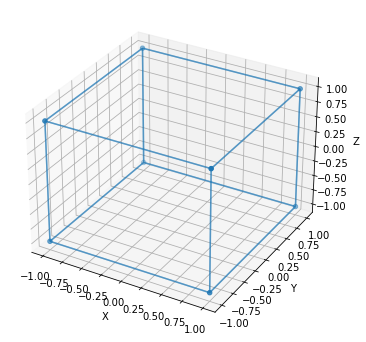

In [63]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

points = np.array([[-1, -1, -1],
                      [1, -1, -1 ],
                      [1, 1, -1],
                      [-1, 1, -1],
                      [-1, -1, 1],
                      [1, -1, 1 ],
                      [1, 1, 1],
                      [-1, 1, 1]])

r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
ax.plot_wireframe(X,Y,one, alpha=0.5)
ax.plot_wireframe(X,Y,-one, alpha=0.5)
ax.plot_wireframe(X,-one,Y, alpha=0.5)
ax.plot_wireframe(X,one,Y, alpha=0.5)
ax.plot_wireframe(one,X,Y, alpha=0.5)
ax.plot_wireframe(-one,X,Y, alpha=0.5)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()




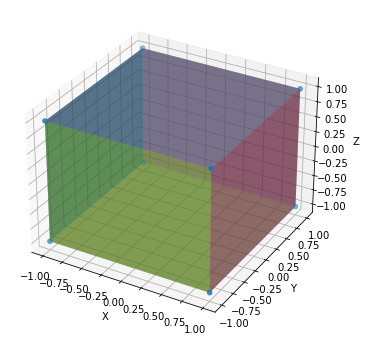

In [69]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

points = np.array([[-1, -1, -1],
                      [1, -1, -1 ],
                      [1, 1, -1],
                      [-1, 1, -1],
                      [-1, -1, 1],
                      [1, -1, 1 ],
                      [1, 1, 1],
                      [-1, 1, 1]])

r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
ax.plot_surface(X,Y,one, alpha=0.5)
ax.plot_surface(X,Y,-one, alpha=0.5)
ax.plot_surface(X,-one,Y, alpha=0.5)
ax.plot_surface(X,one,Y, alpha=0.5)
ax.plot_surface(one,X,Y, alpha=0.5)
ax.plot_surface(-one,X,Y, alpha=0.5)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()




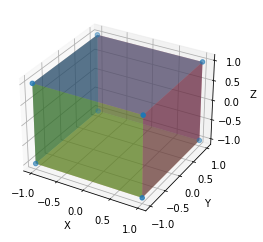

array([[-1, -1, -1],
       [ 1, -1, -1],
       [ 1,  1, -1],
       [-1,  1, -1],
       [-1, -1,  1],
       [ 1, -1,  1],
       [ 1,  1,  1],
       [-1,  1,  1]])

In [95]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

points = np.array([[-1, -1, -1],
                      [1, -1, -1 ],
                      [1, 1, -1],
                      [-1, 1, -1],
                      [-1, -1, 1],
                      [1, -1, 1 ],
                      [1, 1, 1],
                      [-1, 1, 1]])

r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
ax.plot_surface(X,Y,one, alpha=0.5)
ax.plot_surface(X,Y,-one, alpha=0.5)
ax.plot_surface(X,-one,Y, alpha=0.5)
ax.plot_surface(X,one,Y, alpha=0.5)
ax.plot_surface(one,X,Y, alpha=0.5)
ax.plot_surface(-one,X,Y, alpha=0.5)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

points


>>> Affine2D(
    [[1 0 0]
     [0 2 1]
     [0 0 1]])


[-1 -3 -1]
[ 1 -3 -1]
[ 1  1 -1]
[-1  1 -1]
[-1 -1  1]
[ 1 -1  1]
[1 3 1]
[-1  3  1]


[[ 3458764513820540928 -2305834237952545070    45038253431062540]
 [ 2024120247376416129   436860159441177089  6059224184875913246]
 [   52170019967381579  1130486353046339344  4053239733365069908]
 [ 3598028729287492697 -1868733308802428928  1302083523078656238]
 [ 4472392279588548665  2377922683681780481  3617236154961045026]
 [  506129542485914934  3195353005572031453  6840966549749367290]
 [-3834061454452299581   -96030223163633235   -76021406503071854]
 [-7154477967612043019  3472556788319303324     3419638844923062]]


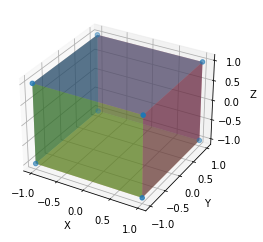

In [27]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

points = np.array([[-1, -1, -1],
                      [1, -1, -1 ],
                      [1, 1, -1],
                      [-1, 1, -1],
                      [-1, -1, 1],
                      [1, -1, 1 ],
                      [1, 1, 1],
                      [-1, 1, 1]])

matrix = np.array([
    [1, 0, 0],
    [0, 2, 1],
    [0, 0, 1]
])

t = Affine2D(matrix)
print(">>>", t)
print("\n")

new_points = np.empty((8,3), int)
    
for vector in points:
    print(matrix.dot(vector))
    np.append(new_points, vector)

print("\n")
print(new_points)
    
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
ax.plot_surface(X,Y,one, alpha=0.5)
ax.plot_surface(X,Y,-one, alpha=0.5)
ax.plot_surface(X,-one,Y, alpha=0.5)
ax.plot_surface(X,one,Y, alpha=0.5)
ax.plot_surface(one,X,Y, alpha=0.5)
ax.plot_surface(-one,X,Y, alpha=0.5)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## What is the spectrum of a matrix?


## What is projection?

## How does projection conserve some shapes? Think about an object casting a shadow.


## How is the projection problem related to eigenvalues and eigenvectors?


## What are principal components? How many components are there (as a function of dimensions of the original space)?


## Definitions

### Euclidean vector

In mathematics, physics and engineering, a Euclidean vector or simply a vector (sometimes called a geometric vector or spatial vector) is a geometric object that has magnitude (or length) and direction. Vectors can be added to other vectors according to vector algebra. A Euclidean vector is frequently represented by a ray (a line segment with a definite direction), or graphically as an arrow connecting an initial point $A$ with a terminal point $B$, and denoted by $\overrightarrow{AB}$.

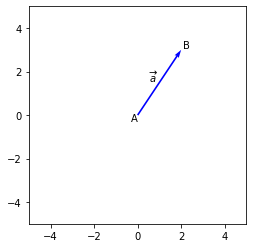

In [35]:
fig = plt.figure()
ax = fig.add_subplot()
ax.annotate('A', xy=(-0.3, -0.3))
ax.annotate('B', xy=(2.1, 3.1))
ax.text(0.5, 1.5, '$\overrightarrow{a}$')

plt.quiver(0, 0, 2, 3, scale_units = "xy", angles = "xy", scale = 1, color ='b')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
# DO NOT USE plt.axis("equal") - will not work, or worse will not ALWAYS work, use plt.gca().set_aspect("equal")
plt.gca().set_aspect("equal")
plt.show()

## Glossary

- PCA - Principal Component Analysis
- 3D - Three Dimensional

## References:

### PCA

<https://www.cs.cmu.edu/~tom/10701_sp11/slides/pca_schlens.pdf>

<https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf>

<https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c>

<https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643>

<https://en.wikipedia.org/wiki/Principal_component_analysis>

<https://builtin.com/data-science/step-step-explanation-principal-component-analysis>

<https://heartbeat.fritz.ai/understanding-the-mathematics-behind-principal-component-analysis-efd7c9ff0bb3>

<https://medium.com/analytics-vidhya/mathematics-behind-principal-component-analysis-pca-1cdff0a808a9>

<https://www.nature.com/articles/nmeth.4346>

<https://en.wikipedia.org/wiki/Norm_(mathematics)>

<https://en.wikipedia.org/wiki/Euclidean_distance>

---

### General

<https://www.wolframalpha.com/>

---

### 3Blue1Brown
<https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw>

---

### StatQuest with Josh Starmer
<https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw/search?query=pca>

---

### Eigenvalues and Eigenvectors

<https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors>

<https://medium.com/fintechexplained/what-are-eigenvalues-and-eigenvectors-a-must-know-concept-for-machine-learning-80d0fd330e47>

<https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Eigenspaces,_geometric_multiplicity,_and_the_eigenbasis_for_matrices>

---

### Eigenbasis

<https://intuitive-math.club/linear-algebra/eigenbasis/>

<https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix>

<https://canvas.harvard.edu/files/3780067/download?download_frd=1&verifier=hNHLukPIpGtkoApu6WIE51qatsQV7VNvCCak7jwW>

<http://www.math.lsa.umich.edu/~kesmith/EigenEverything2017.pdf>

<https://math.stackexchange.com/questions/723762/eigenspace-what-is-it>

<https://math.stackexchange.com/questions/36815/a-simple-explanation-of-eigenvectors-and-eigenvalues-with-big-picture-ideas-of>

### Orthogonal matrix
<https://en.wikipedia.org/wiki/Orthogonal_matrix>

### Orthonormality
<https://en.wikipedia.org/wiki/Orthonormality>

### Spectrum of a matrix
<https://en.wikipedia.org/wiki/Spectrum_of_a_matrix>

### Trace (linear algebra)
<https://en.wikipedia.org/wiki/Trace_(linear_algebra)>

---

### Euclidean vector

<https://en.wikipedia.org/wiki/Euclidean_vector>

---
